In [4]:
import sys
import os
import glob
import numpy as np
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'

import scripts.statistics as stats
import scripts.get_namelist as nml
from scripts.common import *

directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/512x724x256/'
inp = nml.inputs(directory,verbose=True)
Nx,Ny,Nz,Lx,Ly,Lz = nml.read_grid_params(directory,verbose=True)
Ny = int(Ny)
y = np.linspace(Ly/2.,-Ly/2.,Ny)

dir_out = directory.split('/projects/ShockInducedMix/')[-1]
dir_out = '/home/kmatsuno/' + dir_out + '/'
flist = glob.glob(dir_out+"*mean_flux*")
flist.sort()
print([f.split('/')[-1] for f in flist])

# And read growth rates
tlist,dlist,rates = growth_rates(directory+'shearlayer_')

Params for this run:
	Mc = 2.0
	Re = 1000.0
	rr = 1.0
Params for this grid:
	N = 512x724x256
	L = 80.0x80.0x40.0
['mean_flux_0010.h5']


(-13.775933609958507, 0.09466789749678209)
(13.554633471645921, -0.09171309101950884)


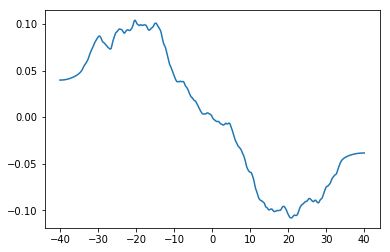

In [19]:
fname = flist[0]
hf = h5py.File(fname,'r')
ibot = hf['ibot']
itop = hf['itop']
q = np.squeeze(hf['F_mass'])
plt.plot(y,q)
print(y[itop],q[itop])
print(y[ibot],q[ibot])
# plt.scatter([y[ibot],y[itop]],[q[ibot],q[itop]],'o')

-0.013129562


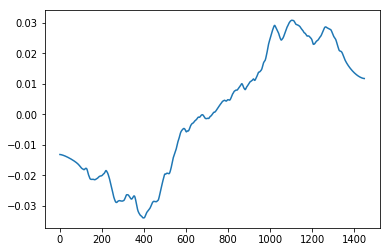

In [186]:
plt.plot(np.mean(np.mean(np.array(q)*np.array(r),axis=-1),axis=0))
print(np.mean(np.mean(np.array(q[:,0,:])*np.array(r[:,0,:]),axis=-1),axis=0))
# plt.imshow(v[:,1447,:])
# plt.colorbar()

